# 🚗 Car Price Prediction using Multiple Linear Regression (Built from Scratch)

In this project, we build a **Car Price Prediction** model using **Multiple Linear Regression** implemented **from scratch using Gradient Descent** — no scikit-learn shortcuts 👨‍💻

The goal is to predict the **Selling Price** of used cars based on several parameters such as car name, manufacturing year, present price, kilometers driven, fuel type, seller type, transmission type, and number of previous owners.

This project demonstrates:
- End-to-end Data Preprocessing 🧼
- One-Hot Encoding for Categorical Data 🧠
- Feature Normalization 📊
- Implementation of Gradient Descent ✍️
- Model Evaluation & Predictions ✅


## 📌 Step 1: Import Libraries and Load Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy


## 🧼 Step 2: Data Preprocessing

- Selected relevant features
- Performed one-hot encoding on categorical columns
- Normalized the numerical features


In [59]:
df = pd.read_csv("car_prediction_data.csv")
df_encoded = pd.get_dummies(df, columns=['Car_Name','Fuel_Type', 'Seller_Type', 'Transmission'], drop_first= True)
df_encoded = df_encoded.astype(int)
X_features = df_encoded.drop('Selling_Price', axis=1)
columns_order = X_features.columns  # store column names for later use
X_train = X_features.values
y_train = df_encoded['Selling_Price'].values


## Normalize The Data

In [60]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_norm = (X_train - X_mean)/X_std

## Cost Function

In [61]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    f_wb = np.zeros(m)
    total_cost = 0
    cost_sum=0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        init_cost = (f_wb - y[i])**2
        cost_sum += init_cost
    total_cost = (1/(2*m))*cost_sum
    return total_cost
        

## Compute Gradient

In [62]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

## 🧮 Step 4: Training the Model


In [63]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [51]:
# initialize parameters
initial_w = np.zeros(X_norm.shape[1])
initial_b = 0
# some gradient descent settings
alpha = 0.001  # Much smaller for unscaled features
iterations = 10000  # More iterations needed
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_norm.shape
for i in range(m):
    pred = np.dot(X_norm[i], w_final) + b_final
    print(f"prediction: {pred:0.2f}, target value: {y_train[i]}")


Iteration    0: Cost    21.76   
Iteration 1000: Cost     2.78   
Iteration 2000: Cost     1.37   
Iteration 3000: Cost     1.12   
Iteration 4000: Cost     1.05   
Iteration 5000: Cost     1.02   
Iteration 6000: Cost     1.00   
Iteration 7000: Cost     0.98   
Iteration 8000: Cost     0.97   
Iteration 9000: Cost     0.97   
b,w found by gradient descent: 4.22,[ 1.65709296  2.3991187  -0.25466291  0.04731837 -0.03128895 -0.28479674
 -0.11004997 -0.15372397 -0.14844144 -0.30624115 -0.04895137  0.01466513
 -0.05114638 -0.0113963  -0.14649423 -0.08181722 -0.08640896  0.15484387
 -0.06446811 -0.04889686 -0.11236942  0.1221189  -0.05895055 -0.09816689
 -0.05236543  0.03538892 -0.00300255  0.14498557 -0.19605304 -0.1439716
 -0.13625098 -0.19023135  0.22103935 -0.24327639 -0.40045383 -0.30070225
  0.07635302 -0.05480352 -0.10858712  0.00278784 -0.11324897 -0.18537004
  0.07732901 -0.08372742 -0.06290661 -0.18186454 -0.08922952 -0.10046341
 -0.11224752 -0.19232639  0.02241006 -0.08987913 -0

In [ ]:
import numpy as np

w_final = np.array([
  1.77577724e+00,  2.76618199e+00, -1.63955083e-01,  9.09299858e-02,
 -5.37131376e-02, -2.76631475e-01, -1.22412142e-01, -1.64705316e-01,
 -1.61468866e-01, -3.27233853e-01, -5.27950213e-02,  1.61387565e-02,
 -5.52528331e-02, -2.90229062e-02, -1.62112293e-01, -8.95793605e-02,
 -9.23925826e-02,  1.55707915e-01, -7.32667632e-02, -5.33752327e-02,
 -1.25669625e-01,  1.28578732e-01, -7.50300935e-02, -1.04879715e-01,
 -5.59997062e-02,  2.88355994e-02, -1.02211244e-02,  1.43127999e-01,
 -2.08715217e-01, -1.58730331e-01, -1.54000134e-01, -2.05147921e-01,
  2.35790595e-01, -2.35657777e-01, -3.89559431e-01, -3.23839352e-01,
  7.88049702e-02, -5.74934524e-02, -1.21515894e-01,  8.36086065e-04,
 -1.26248408e-01, -1.99629342e-01,  5.63122827e-02, -1.09228059e-01,
 -7.28851437e-02, -2.02612947e-01, -1.04547824e-01, -1.18375164e-01,
 -1.25594938e-01, -2.25953248e-01,  2.26602061e-02, -1.06318397e-01,
 -1.34888471e-01,  4.14191234e-02, -1.75286282e-01, -5.53606627e-02,
 -1.66257849e-01, -1.98036012e-01, -2.42215433e-02, -1.62062501e-01,
 -2.00578971e-01, -1.26644423e-01, -2.37893192e-02, -2.54698353e-01,
 -9.38116415e-02, -1.98374118e-01, -1.87440941e-01, -1.93124584e-01,
 -1.32768462e-01, -8.18497003e-02, -2.17772402e-01, -3.68094977e-02,
  2.23531272e-01, -2.45023785e-03, -5.50646529e-02,  3.21296663e-01,
 -6.30900620e-02,  1.95101665e-01, -3.01342172e-01, -2.27317809e-02,
 -1.38928962e-01, -1.04648916e-01, -1.17641502e-01, -1.15626029e-01,
  9.48258753e-01, -1.16460459e-01,  4.01496558e-02, -5.78921358e-02,
 -1.19589473e-01,  7.62551965e-01, -7.67968298e-02,  3.06640554e-01,
 -4.92053024e-02, -7.28517239e-02, -2.23748513e-02, -6.89036415e-03,
  3.17962092e-02,  3.69101447e-02,  1.82970262e-02, -1.34710918e-02,
 -1.35541994e-01,  3.43670814e-01,  5.70164673e-02, -4.65377421e-01,
 -4.36688903e-01
])

b_final = 4.22

## Predction

In [67]:
def predict_price(X, w,b):
    prediction = np.dot(X,w) + b
    return prediction

In [68]:
pred = predict_price(X_norm[5],w_final, b_final)
print(pred)

9.028075910656948


## 📊 Step 5: Cost Reduction Visualization


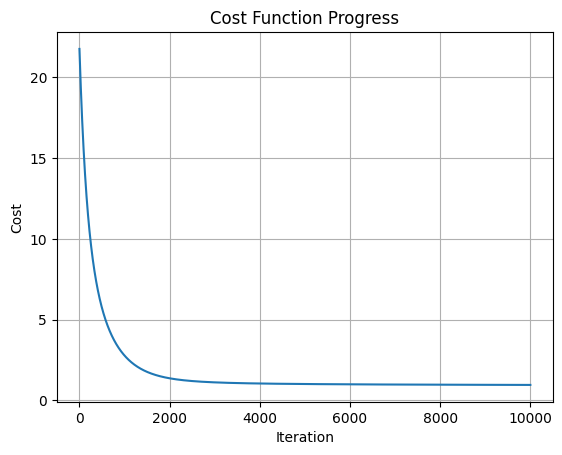

In [52]:
plt.plot(J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Progress')
plt.grid(True)
plt.show()


## 🧪 Step 6: Model Evaluation

We'll check how well our model predicts on the training data.


In [66]:
m = X_norm.shape[0]
for i in range(5):  # show only 5 samples
    pred = np.dot(X_norm[i], w_final) + b_final
    print(f"Prediction: {pred:.2f}, Target: {y_train[i]}")


Prediction: 3.42, Target: 3
Prediction: 5.43, Target: 4
Prediction: 6.95, Target: 7
Prediction: 1.94, Target: 2
Prediction: 5.15, Target: 4


## 🚀 Step 7: Making Real Predictions (Future Flask Deployment)


In [64]:
def predict_single(car_data_dict):
    # Convert dict to DataFrame
    input_df = pd.DataFrame([car_data_dict])
    input_encoded = pd.get_dummies(input_df, columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'], drop_first=True)
    input_encoded = input_encoded.reindex(columns=columns_order, fill_value=0)
    x = input_encoded.values.flatten()
    x_norm = (x - X_mean) / X_std
    prediction = np.dot(x_norm, w_final) + b_final
    return prediction


## 🏁 Conclusion

- Successfully built a **multiple linear regression model from scratch** using gradient descent.
- Preprocessed real-world car dataset including categorical variables.
- Achieved a cost close to **~0.9**, indicating decent prediction accuracy for a simple linear model.
- This model is ready to be deployed in a Flask web app for live car price prediction 🚀


In [65]:
np.save('model/w_final.npy', w_final)
np.save('model/b_final.npy', b_final)
np.save('model/X_mean.npy', X_mean)
np.save('model/X_std.npy', X_std)
np.save('model/columns_order.npy', columns_order)
